# <center> Airline Passenger Satisfaction Analysis </center>

In today's competitive airline industry, passenger satisfaction plays a critical role in shaping customer loyalty and retention. Understanding the factors that influence passenger satisfaction can help airlines enhance their services, improve customer experiences, and maintain a strong brand reputation.

This analysis aims to explore key factors that affect airline passenger satisfaction based on a dataset of passenger feedback. Through various statistical analyses and visualizations, the project will uncover patterns and insights that can help airlines make data-driven decisions to boost overall satisfaction levels.

The study will cover aspects such as passenger demographics, flight experience, service quality, and overall satisfaction ratings, with a goal of identifying areas for potential improvement in airline services.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

airline_df = pd.read_csv('airline_passenger_satisfaction.csv')

# Sample Data
airline_df.head()


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [3]:
# Information about data

airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [4]:
# All columns name

index = 1
for column in airline_df.columns:
    print(index,column)
    index += 1

1 ID
2 Gender
3 Age
4 Customer Type
5 Type of Travel
6 Class
7 Flight Distance
8 Departure Delay
9 Arrival Delay
10 Departure and Arrival Time Convenience
11 Ease of Online Booking
12 Check-in Service
13 Online Boarding
14 Gate Location
15 On-board Service
16 Seat Comfort
17 Leg Room Service
18 Cleanliness
19 Food and Drink
20 In-flight Service
21 In-flight Wifi Service
22 In-flight Entertainment
23 Baggage Handling
24 Satisfaction


In [5]:
# Null data

airline_df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [6]:
# Fill the null values

airline_df['Arrival Delay'] = airline_df['Arrival Delay'].fillna(0)

airline_df.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [7]:
# Code to Classify Age Groups

age_bins = [0,12,19,35,50,65,100]

age_group = ['Children','Teen','Young','Middle-aged-Adults','Adults','Seniors']

airline_df['Age_Group'] = pd.cut(airline_df['Age'],bins=age_bins,labels=age_group,right=False)

airline_df[['Age','Age_Group']]

,Age,Age_Group
0,48,Middle-aged-Adults
1,35,Middle-aged-Adults
2,41,Middle-aged-Adults
3,50,Adults
4,49,Middle-aged-Adults
...,...,...
129875,28,Young
129876,41,Middle-aged-Adults
129877,42,Middle-aged-Adults
129878,50,Adults


# Data Overview


In [8]:
print("Customer Type  -> ",airline_df['Customer Type'].unique())
print("Type of Travel -> ",airline_df['Type of Travel'].unique())
print("Class          -> ",airline_df['Class'].unique())
print("Satisfaction   -> ",airline_df['Satisfaction'].unique())

Customer Type  ->  ['First-time' 'Returning']
Type of Travel ->  ['Business' 'Personal']
Class          ->  ['Business' 'Economy' 'Economy Plus']
Satisfaction   ->  ['Neutral or Dissatisfied' 'Satisfied']


# Question 
What is the overall distribution of passenger satisfaction levels, and how many passengers fall into the categories of fully satisfied, neutral or dissatisfied?

In [9]:
# Display value counts for each satisfaction level


satisfaction_counts = airline_df['Satisfaction'].value_counts()
satisfaction_counts


Satisfaction
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: count, dtype: int64

# Question 
Does the satisfaction level vary by customer type?

In [10]:
airline_df.sample(3)

satisfaction_level_by_Passenger_type = airline_df.groupby('Customer Type')['Satisfaction'].value_counts(normalize=True).unstack() * 100
satisfaction_level_by_Passenger_type



Satisfaction,Neutral or Dissatisfied,Satisfied
Customer Type,,
First-time,76.030278,23.969722
Returning,52.188501,47.811499




# Question 
Is customer satisfaction influenced by the class of service (e.g., Economy, Business, Economy Plus etc.)?

In [11]:
airline_df.sample(1)

satisfaction_level_by_class_type = airline_df.groupby('Class')['Satisfaction'].value_counts(normalize=True).unstack() * 100
satisfaction_level_by_class_type


Satisfaction,Neutral or Dissatisfied,Satisfied
Class,,
Business,30.556628,69.443372
Economy,81.232743,18.767257
Economy Plus,75.358623,24.641377


# Distributation of Passenger by Age Group

In [12]:
passenger_distribution_by_age_group =  airline_df['Age_Group'].value_counts().sort_values(ascending=False) 
passenger_distribution_by_age_group

Age_Group
Middle-aged-Adults    44352
Young                 38277
Adults                30198
Teen                   7070
Seniors                5983
Children               4000
Name: count, dtype: int64

# Question
What is the impact of age group on passenger satisfaction levels?

In [13]:
satisfaction_by_age_group = airline_df.groupby('Age_Group')['Satisfaction'].value_counts(normalize=True).unstack() * 100
satisfaction_by_age_group = satisfaction_by_age_group.reset_index()
satisfaction_by_age_group

C:\Users\ASUS\AppData\Local\Temp\ipykernel_35516\2278562801.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction_by_age_group = airline_df.groupby('Age_Group')['Satisfaction'].value_counts(normalize=True).unstack() * 100


Satisfaction,Age_Group,Neutral or Dissatisfied,Satisfied
0,Children,87.200000,12.800000
1,Teen,79.660537,20.339463
2,Young,63.356585,36.643415
3,Middle-aged-Adults,47.190657,52.809343
4,Adults,47.251474,52.748526
5,Seniors,81.597861,18.402139


# Question 
Is gender a significant factor influencing passenger satisfaction in airline services?

In [14]:
satisfaction_by_gender = airline_df.groupby('Gender')['Satisfaction'].value_counts(normalize=True).unstack() * 100
satisfaction_by_gender = satisfaction_by_gender.reset_index()

satisfaction_by_gender


Satisfaction,Gender,Neutral or Dissatisfied,Satisfied
0,Female,57.102536,42.897464
1,Male,55.988497,44.011503


# Question
How does the punctuality of flights (in terms of arrival and departure delays) affect passenger satisfaction? Specifically, how do satisfaction levels differ between passengers on flights that arrived or departed on time versus those on delayed flights?

***Satisfaction Level By Arrival Status***

In [15]:
# Set Arrival Status and departure Status

airline_df['Arrival_Status'] = airline_df['Arrival Delay'].apply(lambda x: 'on time' if x == 0.0 else 'Delayed')
airline_df['Departure_Status'] = airline_df['Departure Delay'].apply(lambda x : 'on time' if x == 0 else 'Delayed')




In [16]:
satisfaction_by_arrival_status = (airline_df.groupby('Arrival_Status')['Satisfaction'].value_counts(normalize=True).unstack() * 100).reset_index()
satisfaction_by_arrival_status


satisfaction_by_arrival_status_melt = satisfaction_by_arrival_status.melt(id_vars='Arrival_Status',var_name='Satisfaction',value_name='Percentage')
satisfaction_by_arrival_status_melt



,Arrival_Status,Satisfaction,Percentage
0,Delayed,Neutral or Dissatisfied,61.624423
1,on time,Neutral or Dissatisfied,52.620786
2,Delayed,Satisfied,38.375577
3,on time,Satisfied,47.379214


***Satisfaction Level By Depauture Status***

In [17]:
Satisfaction_level_by_departure_status = (airline_df.groupby('Departure_Status')['Satisfaction'].value_counts(normalize=True).unstack() * 100).reset_index()
Satisfaction_level_by_departure_status

Satisfaction,Departure_Status,Neutral or Dissatisfied,Satisfied
0,Delayed,59.788762,40.211238
1,on time,54.061018,45.938982


# Question
Do the various types of ratings have an impact on passenger satisfaction?

In [18]:
# Create a new column satisfaction_digit(0 for Neutral or Dissatisfied and 1 for Satisfied)


airline_df['Satisfaction'] = airline_df['Satisfaction'].str.strip()
airline_df['Satisfaction_digit'] = airline_df['Satisfaction'].map( {'Satisfied':1 , 'Neutral or Dissatisfied':0} )
rating_columns = airline_df.columns[airline_df.columns.str.contains('Service|Comfort|Convenience|Boarding|Food|Wifi|Entertainment|Handling')].to_list()
correlation_matrix = airline_df[rating_columns + ['Satisfaction_digit']].corr()
correlation_matrix


,Departure and Arrival Time Convenience,Check-in Service,Online Boarding,On-board Service,Seat Comfort,Leg Room Service,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction_digit
Departure and Arrival Time Convenience,1.000000,0.091132,0.072287,0.067297,0.008666,0.010617,0.000687,0.072195,0.344915,-0.008380,0.070833,-0.054270
Check-in Service,0.091132,1.000000,0.204238,0.244619,0.189979,0.152693,0.085198,0.237601,0.043762,0.119554,0.234503,0.237252
Online Boarding,0.072287,0.204238,1.000000,0.154242,0.419253,0.123225,0.233500,0.074058,0.457445,0.283922,0.083541,0.501749
On-board Service,0.067297,0.244619,0.154242,1.000000,0.130545,0.357721,0.057404,0.551569,0.119928,0.418574,0.520296,0.322205
Seat Comfort,0.008666,0.189979,0.419253,0.130545,1.000000,0.104272,0.575846,0.068842,0.121513,0.611837,0.074620,0.348829
Leg Room Service,0.010617,0.152693,0.123225,0.357721,0.104272,1.000000,0.033173,0.369569,0.160317,0.300397,0.371455,0.312424
Food and Drink,0.000687,0.085198,0.233500,0.057404,0.575846,0.033173,1.000000,0.035210,0.132214,0.623461,0.035321,0.211340
In-flight Service,0.072195,0.237601,0.074058,0.551569,0.068842,0.369569,0.035210,1.000000,0.110029,0.406094,0.629237,0.244918
In-flight Wifi Service,0.344915,0.043762,0.457445,0.119928,0.121513,0.160317,0.132214,0.110029,1.000000,0.207802,0.120376,0.283460
In-flight Entertainment,-0.008380,0.119554,0.283922,0.418574,0.611837,0.300397,0.623461,0.406094,0.207802,1.000000,0.379123,0.398234


# Average Rating of each Services

In [19]:
# Rating Column name

rating_columns = [
    'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service',
    'Online Boarding', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
    'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment',
    'Baggage Handling'
]


rating_column_means = airline_df[rating_columns].mean().sort_values(ascending=False)
rating_column_means


In-flight Service                         3.642193
Baggage Handling                          3.632114
Seat Comfort                              3.441361
On-board Service                          3.383023
In-flight Entertainment                   3.358077
Leg Room Service                          3.350878
Check-in Service                          3.306267
Cleanliness                               3.286326
Online Boarding                           3.252633
Food and Drink                            3.204774
Departure and Arrival Time Convenience    3.057599
Ease of Online Booking                    2.756876
In-flight Wifi Service                    2.728696
dtype: float64

**Define the highest-rated services based on customer ratings.**

In [20]:
first_3_raitng_column = rating_column_means[0:3]
first_3_raitng_column


In-flight Service    3.642193
Baggage Handling     3.632114
Seat Comfort         3.441361
dtype: float64

**Define the lowest-rated services based in customer ratings.**


In [21]:
last_2_rating_column = rating_column_means[-2::]
last_2_rating_column

Ease of Online Booking    2.756876
In-flight Wifi Service    2.728696
dtype: float64

------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------

***1. Overall Satisfaction Distrubuation***

*Finding* -> Among all passengers surveyed, 56.7% reported being Neutral or Dissatisfied, while the remaining 43.3% expressed satisfaction with their experience.

*Recommendation* -> With over half of the passengers classified as Neutral or Dissatisfied, it is imperative to enhance various services to improve overall passenger satisfaction.

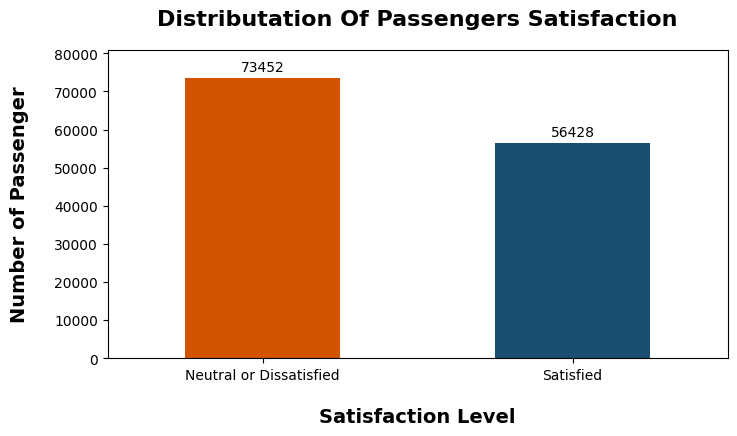

In [22]:
# Plot the satisfaction level distribution

plt.figure(figsize=(8,4))
bars = satisfaction_counts.plot(kind='bar',color=['#D35400', '#1B4F72'])

plt.xlabel('Satisfaction Level',fontdict={'fontweight':'bold','fontsize':14},labelpad=18)
plt.ylabel('Number of Passenger',fontdict={'fontweight':'bold','fontsize':14},labelpad=18)
bars.set_title('Distributation Of Passengers Satisfaction',fontdict={'fontweight':'bold','fontsize':16},pad=18)
plt.xticks(rotation=0)

plt.ylim(0, satisfaction_counts.max() + satisfaction_counts.max() * 0.1)  # 10% padding above the tallest bar

for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),  # The text to display (the count)
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # The position of the text
                  ha='center', va='center', xytext=(0, 8),  # Offset the text slightly above the bar
                  textcoords='offset points')

plt.show()

***2. Satisfaction Distributation By Customer Type***

*Finding* -> The satisfaction level for returning customers stands at 47.81%, significantly higher than the 23.97% satisfaction level for first-time customers.

-> Among returning passengers, 52.19% are categorized as Neutral or Dissatisfied, whereas 76.03% of first-time passengers fall into the same category.

*Recommendation* -> Improving satisfaction among first-time passengers should be a key focus, as their positive experience can significantly impact overall satisfaction. At the same time, attention must be given to returning passengers, as a notable portion still falls into the Neutral or Dissatisfied category. Addressing both groups will help boost customer loyalty and enhance overall service quality.

<Figure size 800x400 with 0 Axes>

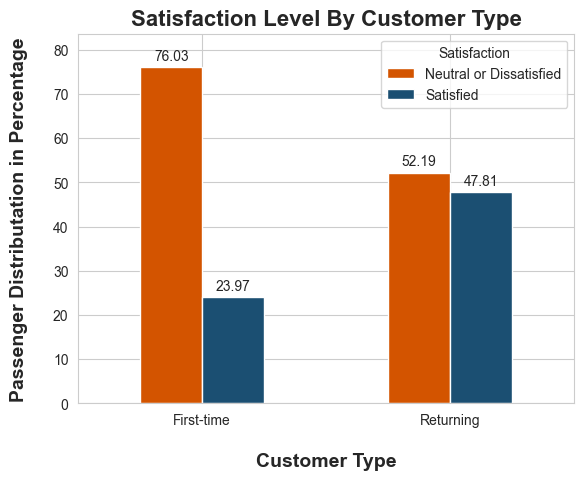

In [23]:
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")

bars = satisfaction_level_by_Passenger_type.plot(kind='bar',color=['#D35400','#1B4F72'])
plt.title('Satisfaction Level by Customer Type')
plt.xlabel('Customer Type',fontdict={'fontweight':'bold','fontsize':14},labelpad=18)
plt.ylabel('Passenger Distributation in Percentage',fontdict={'fontweight':'bold','fontsize':14},labelpad=18)
bars.set_title('Satisfaction Level By Customer Type',fontdict={'fontweight':'bold','fontsize':16})
plt.xticks(rotation=0)
plt.ylim(0,satisfaction_level_by_Passenger_type.max().max() + satisfaction_level_by_Passenger_type.max().max() * 0.1)

for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.2f'),  # The text to display (the count)
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # The position of the text
                  ha='center', va='center', xytext=(0, 8),  # Offset the text slightly above the bar
                  textcoords='offset points')
    
plt.show()

***3. Satisfaction Distributation By Class***

*Finding* -> Passengers in Business Class show the highest satisfaction, with **69.44%** expressing satisfaction.
In contrast, satisfaction levels in Economy Class and Economy Plus are significantly lower, at **18.76%** and **24.64%**, respectively.

*Recommendation* -> Business Class passengers exhibit the highest satisfaction levels, while Economy and Economy Plus passengers show significantly lower satisfaction rates. To improve overall customer satisfaction, the airline should focus on enhancing the experience for Economy and Economy Plus travelers.

<Figure size 1200x1000 with 0 Axes>

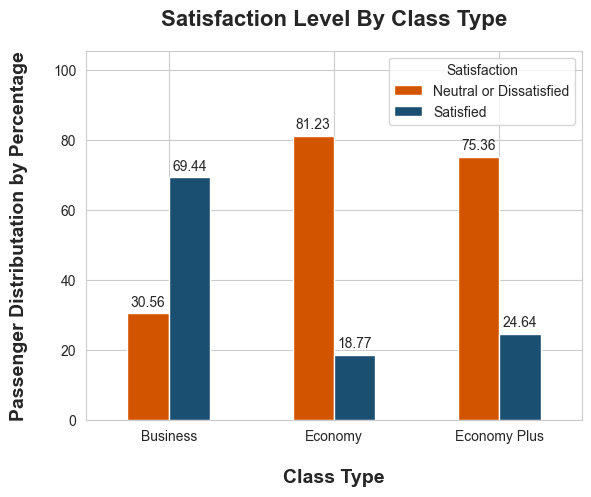

In [24]:
plt.figure(figsize=(12,10))

sns.set_style("whitegrid")

bars = satisfaction_level_by_class_type.plot(kind='bar',color=['#D35400','#1B4F72'])

plt.title("Satisfaction Level by Class Type")
plt.xlabel("Class Type",fontdict={'fontweight':'bold','fontsize':14},labelpad=18)
plt.ylabel("Passenger Distributation by Percentage",fontdict={'fontweight':'bold','fontsize':14},labelpad=18)
bars.set_title('Satisfaction Level By Class Type',fontdict={'fontweight':'bold','fontsize':16},pad=18)
plt.xticks(rotation=0)

plt.ylim(0,satisfaction_level_by_class_type.max().max() + satisfaction_level_by_class_type.max().max() * 0.3)

for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.2f'),  # The text to display (the count)
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # The position of the text
                  ha='center', va='center', xytext=(0, 8),  # Offset the text slightly above the bar
                  textcoords='offset points')
    
plt.show()



***4. Satisfaction By Age Group***

*Finding* -> Passengers in the **Children, Teen, Young, and Senior** age groups are predominantly Neutral or Dissatisfied with their airline experience. In contrast, **Middle-aged Adults and Adults** have over half of their passengers reporting satisfaction. 

*Recommendation* -> Our primary focus should be on **dissatisfied age groups** to improve overall satisfaction levels. Additionally, maintaining attention on the **satisfied age groups** is essential to foster their loyalty and retain their positive experience with the airline.

***Distributation Of Passenger By Age Group***

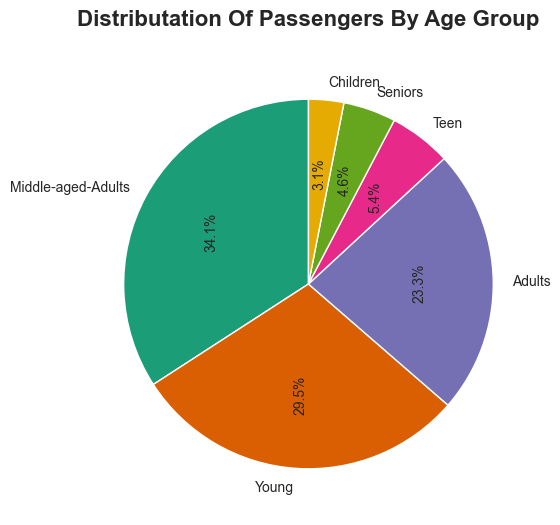

In [25]:
plt.figure(figsize=(6,6))

plt.title('Distributation Of Passengers By Age Group',pad=20,fontdict={'fontweight':'bold','fontsize':'16'})
wedges, texts, autotexts  = plt.pie(passenger_distribution_by_age_group,
        labels=passenger_distribution_by_age_group.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Dark2.colors,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        )

for autotext in autotexts:
    autotext.set_rotation(90)
    

plt.show()

***Satisfation Level Based On Age Group***

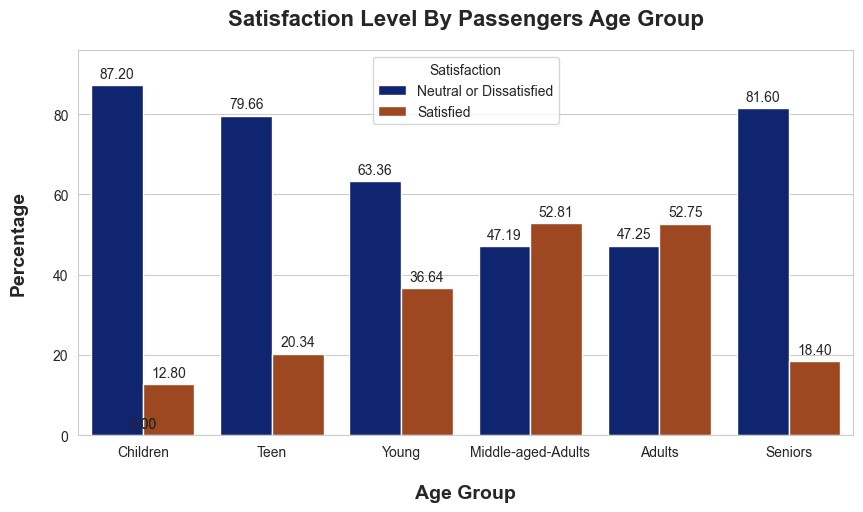

In [26]:
plt.figure(figsize=(10,5))

# Melt the data
satisfaction_melted = satisfaction_by_age_group.melt(id_vars='Age_Group', var_name='Satisfaction', value_name='Percentage')

bars = sns.barplot(data=satisfaction_melted,x='Age_Group',y='Percentage',hue='Satisfaction',palette='dark')

plt.xlabel("Age Group",fontdict={'fontweight':'bold','fontsize':14},labelpad=18)
plt.ylabel("Percentage",fontdict={'fontweight':'bold','fontsize':14},labelpad=18)
bars.set_title('Satisfaction Level By Passengers Age Group',fontdict={'fontweight':'bold','fontsize':16},pad=18)

max_values = satisfaction_by_age_group.select_dtypes(include='number').max().max()
plt.ylim(0,max_values + max_values* 0.1)

for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.2f'),  # The text to display (the count)
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # The position of the text
                  ha='center', va='center', xytext=(0, 8),  # Offset the text slightly above the bar
                  textcoords='offset points')

plt.show()



***5. Satisfaction by Gender***

*Finding* ->  Satisfaction and dissatisfaction levels are **nearly equal between both gender groups**, with a similar number of passengers in each category. 

*Recommendation* -> Gender does not appear to be a key factor influencing passenger satisfaction. Therefore, efforts to enhance satisfaction should focus on other critical service areas to drive overall improvement.


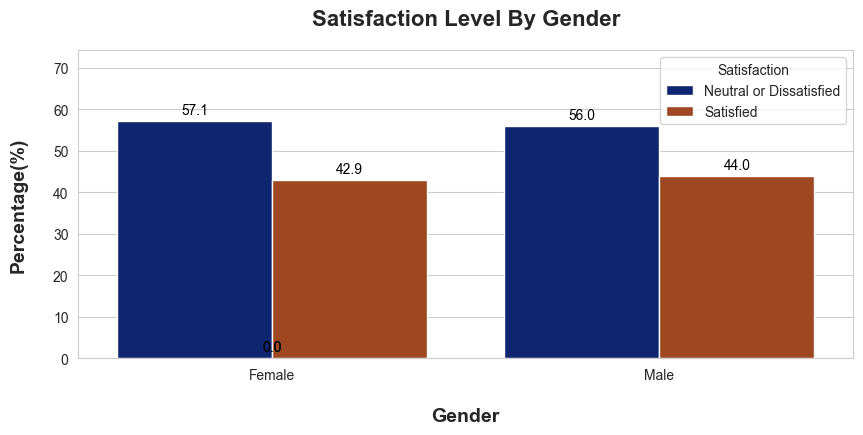

In [27]:
plt.figure(figsize=(10,4))

# Melt the data
satisfaction_by_gender_melt = satisfaction_by_gender.melt(id_vars='Gender',var_name='Satisfaction',value_name='Percentage')

bars = sns.barplot(data=satisfaction_by_gender_melt,x='Gender',y='Percentage',hue='Satisfaction',palette='dark')

plt.title("Satisfaction Level By Gender")
plt.xlabel("Gender",fontdict={'fontweight':'bold','fontsize':14},labelpad=18)
plt.ylabel("Percentage(%)",fontdict={'fontweight':'bold','fontsize':14},labelpad=18)
bars.set_title("Satisfaction Level By Gender",fontdict={'fontweight':'bold','fontsize':16},pad=18)

max_values = satisfaction_by_gender_melt.select_dtypes(include='number').max().max()
plt.ylim(0,max_values + max_values * 0.3)

for p in bars.patches:
    bars.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
plt.xticks(rotation=0)

plt.show()


***6. Satisfaction By Arrival Status***

*Finding* -> When flights are delayed **61.6%** of passengers report being Neutral or Dissatisfied, with only **38.4%** expressing satisfaction. In contrast, on-time arrivals result in **47.4%** passenger satisfaction, while **52.6%** remain Neutral or Dissatisfied.

*Recommendation* -> The data indicates that flight arrival times have a significant impact on passenger satisfaction. Therefore, improving **punctuality** should be a key focus to enhance overall customer satisfaction. 

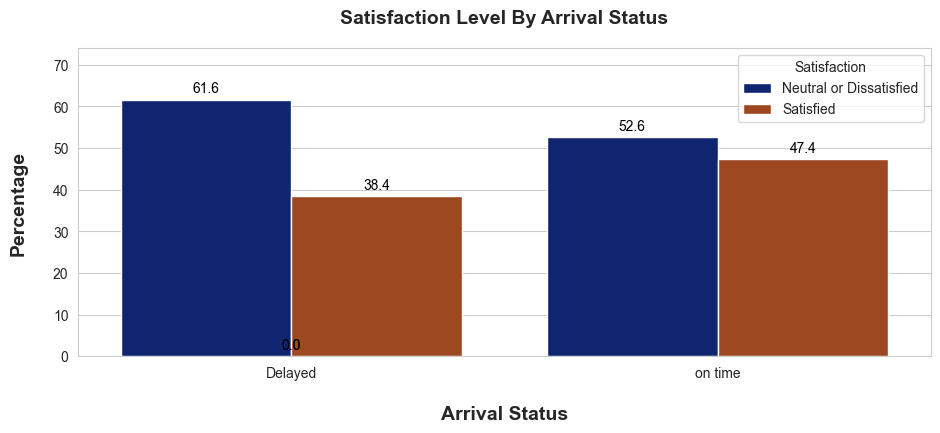

In [28]:
satisfaction_by_arrival_status = (airline_df.groupby('Arrival_Status')['Satisfaction'].value_counts(normalize=True).unstack() * 100).reset_index()
satisfaction_by_arrival_status

satisfaction_by_arrival_status_melt = satisfaction_by_arrival_status.melt(id_vars='Arrival_Status',var_name='Satisfaction',value_name='Percentage')
satisfaction_by_arrival_status_melt

plt.figure(figsize=(11,4))
bars = sns.barplot(data=satisfaction_by_arrival_status_melt,x='Arrival_Status',y='Percentage',hue='Satisfaction',palette='dark')
plt.xlabel('Arrival Status',fontdict={'fontweight':'bold','fontsize':14},labelpad=18)
plt.ylabel('Percentage',fontdict={'fontweight':'bold','fontsize':14},labelpad=18)
bars.set_title('Satisfaction Level By Arrival Status',pad=18,fontdict={'fontweight':'bold','fontsize':14})

max_value = satisfaction_by_arrival_status_melt.select_dtypes(include='number').max().max()
plt.ylim(0,max_value + max_value * 0.2)


for p in bars.patches:
    bars.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')


plt.show()

**7. Satisfaction By Depauture Status**

*Finding* -> assengers on delayed flights experience higher dissatisfaction, with **59.79%** reporting Neutral or Dissatisfied compared to **54.06%** for on-time flights. Conversely, satisfaction increases significantly for on-time departures, with **45.94%** satisfied versus only **40.21%** for delayed flights.

*Recommendation* -> The data indicates that flight delays significantly reduce passenger satisfaction, with **59.79%** of passengers dissatisfied compared to **54.06%** for on-time flights. Improving punctuality is essential for enhancing overall customer satisfaction.

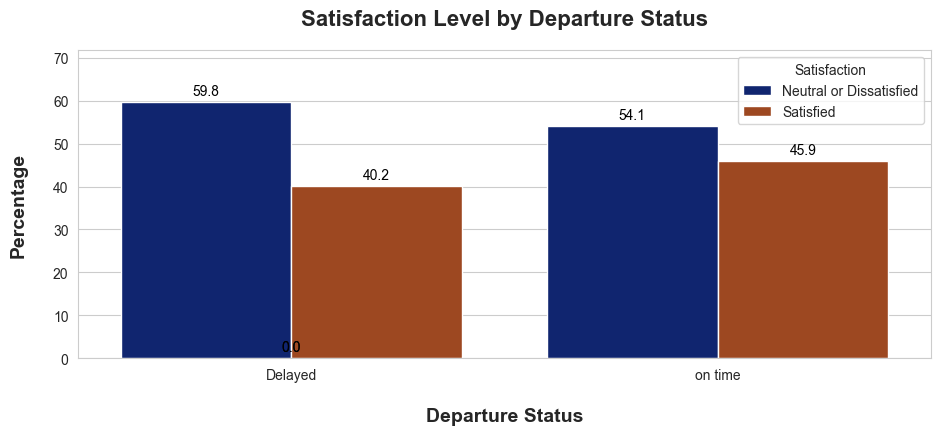

In [29]:
Satisfaction_level_by_departure_status_melt = Satisfaction_level_by_departure_status.melt(id_vars='Departure_Status',var_name='Satisfaction',value_name='Percentage')
Satisfaction_level_by_departure_status_melt


plt.figure(figsize=(11,4))

bars = sns.barplot(data=Satisfaction_level_by_departure_status_melt,x='Departure_Status',y='Percentage',hue='Satisfaction',palette='dark')

# plt.title('Satisfaction Level by Departure Status',fontdict={'fontweight':'bold','fontsize':14})
plt.xlabel('Departure Status',fontdict={'fontweight':'bold','fontsize':14},labelpad=18)
plt.ylabel('Percentage',fontdict={'fontweight':'bold','fontsize':14},labelpad=18)
bars.set_title('Satisfaction Level by Departure Status',pad=18,fontdict={'fontweight':'bold','fontsize':16})

max_value = Satisfaction_level_by_departure_status_melt.select_dtypes(include='number').max().max()
plt.ylim(0,max_value+max_value * 0.2)

for p in bars.patches:
    bars.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')



plt.show()

***8. Satisfaction Correlation To Different Services***

*Finding* -> The data reveals that **Online Boarding, Seat Comfort, and In-flight Entertainment** exhibit a strong positive correlation with passenger satisfaction levels. Other services also contribute to satisfaction but to a lesser extent.

*Recommendation* -> o enhance passenger satisfaction, the airline company should prioritize improvements in **Online Boarding, Seat Comfort, and In-flight Entertainment**, as these services show a strong positive correlation with satisfaction levels. Additionally, the airline should assess and optimize other service areas to further elevate the overall customer experience.

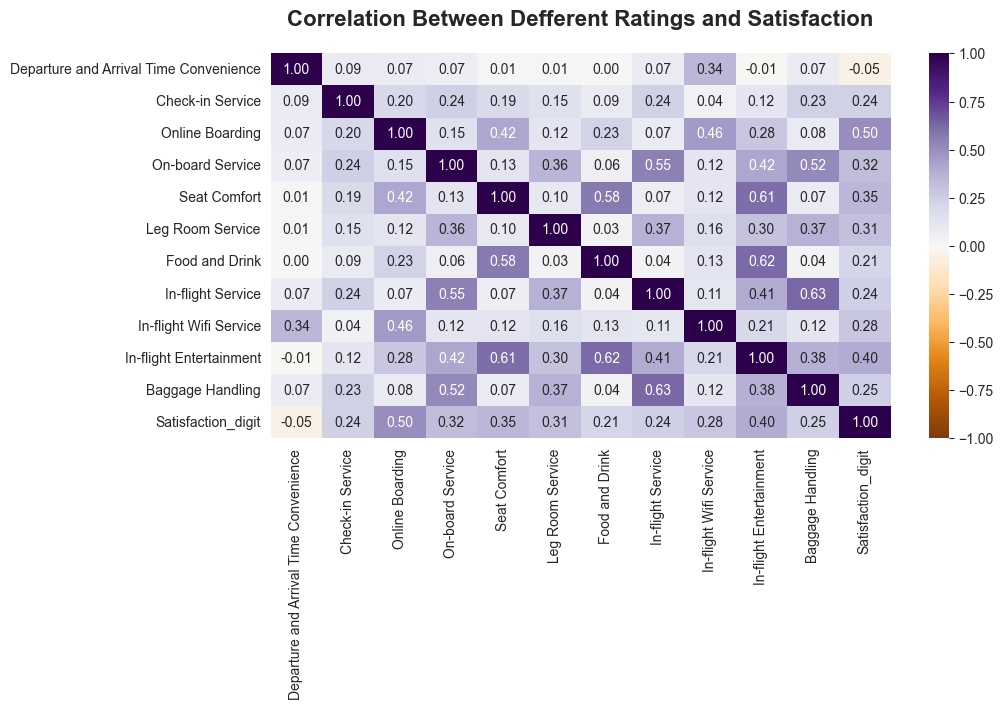

In [30]:
plt.figure(figsize=(10,5))
# plt.title(fontdict={'fontweight':'bold','fontsize':14})
heatmap = sns.heatmap(correlation_matrix,annot=True,cmap='PuOr',fmt='.2f',vmin=-1,vmax=1)
heatmap.set_title("Correlation Between Defferent Ratings and Satisfaction",pad=20,fontdict={'fontweight':'bold','fontsize':16})
plt.show()

***Top 3 Services***

C:\Users\ASUS\AppData\Local\Temp\ipykernel_35516\2080047160.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(first_3_raitng_column,width=0.5,palette='dark')


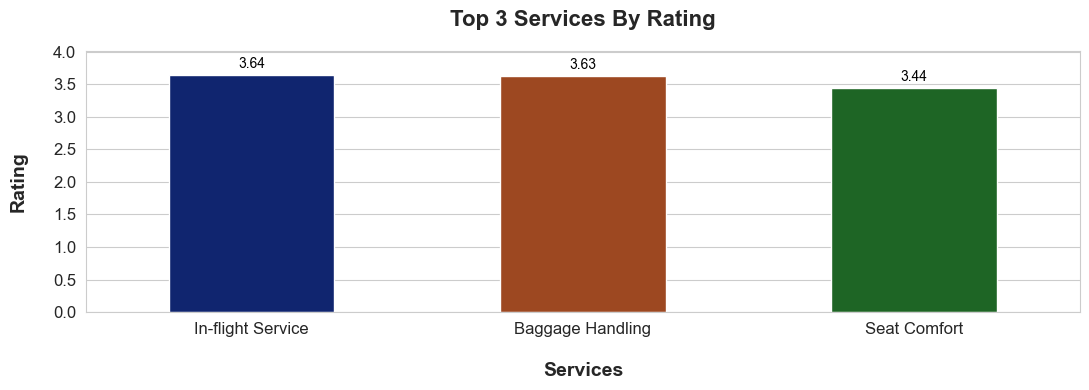

In [31]:
sns.set_style("whitegrid")

plt.figure(figsize=(11,4))

plt.xlabel('Services',fontdict={'fontweight':'bold','fontsize':14},labelpad=18)
plt.ylabel('Rating',fontdict={'fontweight':'bold','fontsize':14},labelpad=18)
plt.title('Top 3 Services By Rating',fontdict={'fontweight':'bold','fontsize':16},pad=18)

max_value = first_3_raitng_column.max()
plt.ylim(0,max_value+max_value*0.1)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

bars = sns.barplot(first_3_raitng_column,width=0.5,palette='dark')

for p in bars.patches:
    bars.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')


plt.tight_layout()
plt.show()

***The Last 2 Lowest Rated Services***

C:\Users\ASUS\AppData\Local\Temp\ipykernel_35516\376414870.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(last_2_rating_column,width=0.5,palette='dark')


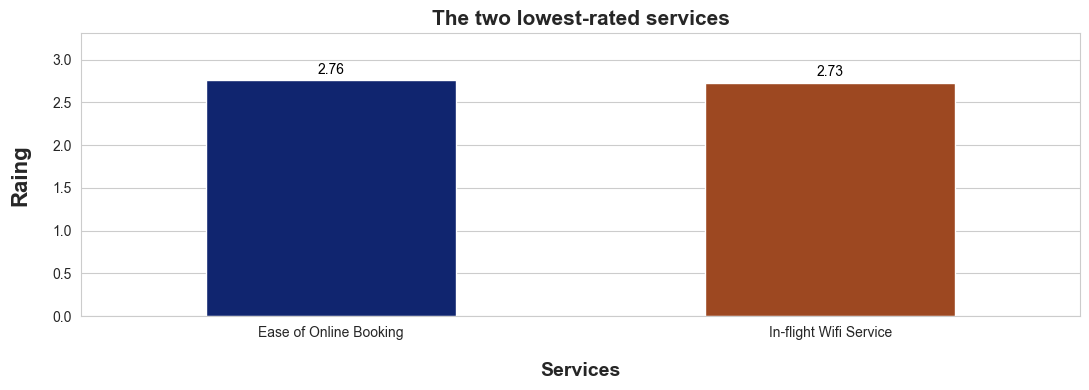

In [32]:
sns.set_style("whitegrid")
plt.figure(figsize=(11,4))

plt.title("The two lowest-rated services",fontdict={'fontweight':'bold','fontsize':15})
plt.xlabel('Services',fontdict={'fontweight':'bold','fontsize':14},labelpad=16)
plt.ylabel('Raing',fontdict={'fontweight':'bold','fontsize':16},labelpad=16)
max_value = last_2_rating_column.max()
plt.ylim(0,max_value+max_value*0.2)
bars = sns.barplot(last_2_rating_column,width=0.5,palette='dark')

for p in bars.patches:
    bars.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

In [33]:
airline_df.info()

airline_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 28 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   ID                                      129880 non-null  int64   
 1   Gender                                  129880 non-null  object  
 2   Age                                     129880 non-null  int64   
 3   Customer Type                           129880 non-null  object  
 4   Type of Travel                          129880 non-null  object  
 5   Class                                   129880 non-null  object  
 6   Flight Distance                         129880 non-null  int64   
 7   Departure Delay                         129880 non-null  int64   
 8   Arrival Delay                           129880 non-null  float64 
 9   Departure and Arrival Time Convenience  129880 non-null  int64   
 10  Ease of Online Booking          

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Age_Group,Arrival_Status,Departure_Status,Satisfaction_digit
33956,33957,Female,59,Returning,Business,Business,1554,0,0.0,4,...,2,2,2,2,2,Neutral or Dissatisfied,Adults,on time,on time,0
83953,83954,Male,51,Returning,Business,Business,321,167,154.0,0,...,4,4,0,3,5,Satisfied,Adults,Delayed,Delayed,1
101187,101188,Female,67,Returning,Personal,Economy,1090,50,46.0,1,...,5,2,4,2,2,Satisfied,Seniors,Delayed,Delayed,1
58776,58777,Male,22,First-time,Business,Economy,1005,10,9.0,3,...,3,4,3,3,3,Neutral or Dissatisfied,Young,Delayed,Delayed,0
66272,66273,Female,41,Returning,Business,Business,2688,4,0.0,3,...,5,4,3,4,4,Satisfied,Middle-aged-Adults,on time,Delayed,1
